<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Предобработка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Исследовательский анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Портрет пользователя каждого региона
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Проверка гипотез
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">
                    <span class="toc-item-num">6&nbsp;&nbsp;
                    </span>Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Исследование компьютерных игр

**Описание проекта**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования** - выявить закономерности, определяющие успешность игры, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Таблица games:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

Импортируем библиотеки, которые пригодятся нам для работы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Откроем файл с данными `games.csv` и изучим общую информацию.

In [2]:
data = pd.read_csv('/datasets/games.csv')

display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из таблицы с данными видно, что названия столбцов написаны разным регистром, нужно привести их к единому типу.

В 6 столбцах (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) обнаружены пропущенные значения. Посчитаем их долю.

In [3]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Больше всего пропущенных значений в столбце Critic_Score - 51%. В столбцах User_Score и Rating тоже большой процент пропусков - 40%. В столбце Year_of_Release пропусков 1,6%. Посмотрим далее, можно ли чем-то заменить эти пропуски.

В столбцах Name и Genre всего по 2 пропуска. Удалим совсем эти строки далее в разделе Предобработка данных.

## Предобработка данных

Прежде чем разбираться с пропусками, заменим названия столбцов - приведем их к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пропущенных значений в столбцах name и genre очень мало (0.012%), процентр пропущенных значений для столбца year_of_release тоже мал (1.6), удалим строки с пропущенными значениями.

In [5]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data = data.dropna(subset=['name','genre', 'year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце `year_of_release` указан год выпуска. Заменим тип данных с float64 на int.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtype

dtype('int32')

Столбцы `user_score` и `rating` нужно привести к типу float, а столбец `critic_score` к типу int, но сначала заменить пропущенные значения. Просто удалить мы их не можем, так как они составляют большую долю от всех.

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение 'tbd' - это аналог пропуска. Заменим его на NaN. 

Пропущенные значения в данном случае мы не можем заменить средним или медианой, так как каждая игра у нас уникальная и нельзя предположить что рейтинги везде будут примерно одинаковыми. Удалить пропуски мы тоже не можем, так как их очень много (40%), поэтому заменим их тоже на NaN. Также заменим тип данных у этого столбца.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец total_sales.

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**:

* Привели названия столбцов к нижнему регистру.
* Заменили типы данных в столбцах year_of_release и user_score.
* Удалили строки с пропущенными значениями в столбцах name, genre и year_of_release, так как их было очень мало.
* Заменили значения tbd в столбце user_score на NaN.
* Посчитали суммарные продажи во всех регионах и записали их в столбец total_sales.

## Исследовательский анализ данных

1) Посмотрим, сколько игр выпускалось в разные годы.

In [12]:
year_count = data.groupby('year_of_release')['name'].count().reset_index()
year_count = year_count.rename(columns={'name': 'count_games'})
year_count.head()

,year_of_release,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Построим график по данным из таблицы year_count.

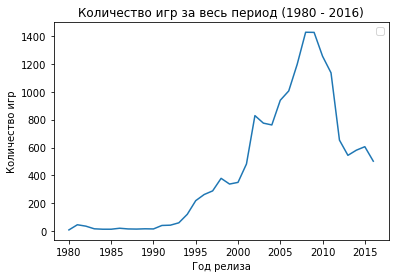

In [13]:
year_count.plot(x='year_of_release', y='count_games')
plt.title('Количество игр за весь период (1980 - 2016)')
plt.legend('')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Более наглядной будет столбчатая диаграмма.

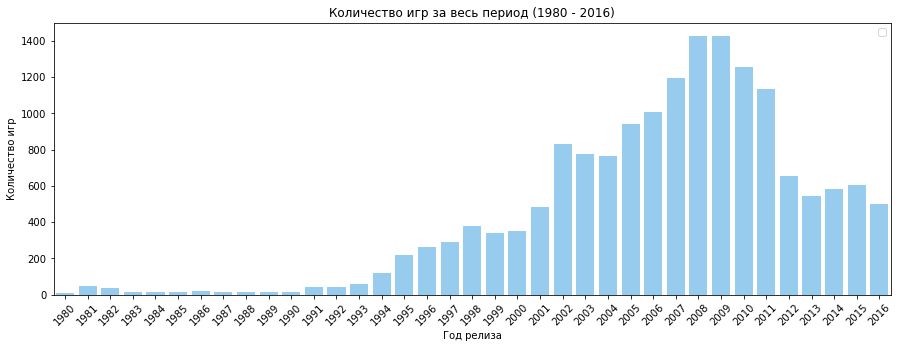

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(x=year_count['year_of_release'], y=year_count['count_games'], color='#89CFFD')
plt.xticks(rotation=45)
plt.title('График распределения количества игр')
plt.title('Количество игр за весь период (1980 - 2016)')
plt.legend('')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

**Вывод**:

Данные за все периоды не нужны. На диаграмме наблюдается длинный хвост слева. В период с 1980 по 2000 год игр выпускалось очень мало. Больше всего игр выпускалось в 2008 - 2009 годах (больше 1400). В этом месте на графике наблюдается пик. С 2012 по 2016 года наблюдается спад продаж. Будем считать продажи актуальными, начиная с 2013 года. 

2) Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [15]:
platform = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


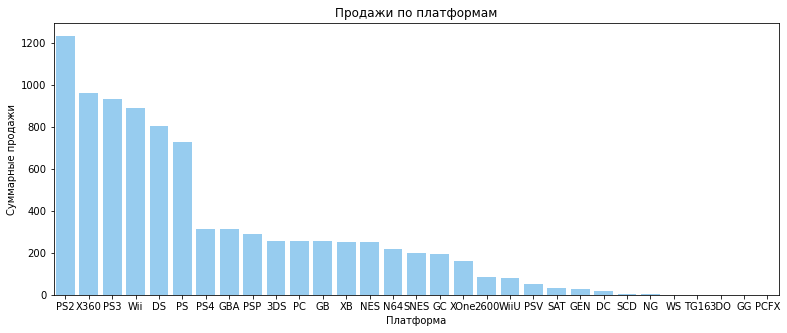

In [16]:
plt.figure(figsize=(13, 5))
sns.barplot(x=platform.index, y=platform['total_sales'], color='#89CFFD')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

По графику видно, что самой популярной платформой является PS2. Ее продажи (total_sales) чуть больше 1200. Следующие 4 платформы не намного отличаются друг от друга по количеству продаж. Продажа каждой чуть меньше предыдущей. У X360 продажи чуть меньше 1000. Продажи следущей платформа PS3 чуть меньше X360, но тоже близки к 1000. На четвертом месте Wii и замыкает пятерку DS с продажами в районе 800.

Так у нас получилось 5 популярных платформ: PS2, X360, PS3, Wii, DS и PS. Построим для них распределение по годам.

Сначала создадим отдельный список из этих платформ.

In [17]:
popular_platform_list = list(platform.index[:5])
popular_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

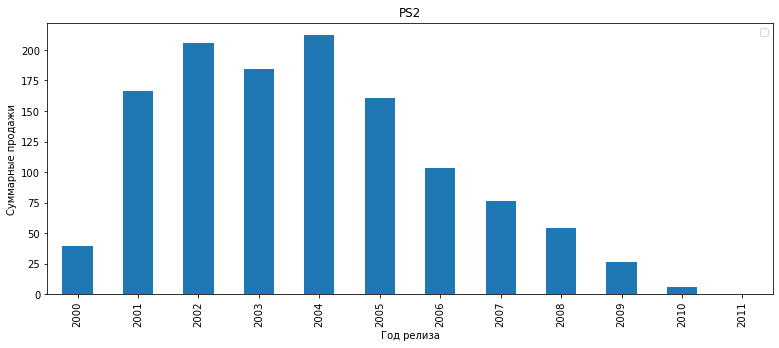

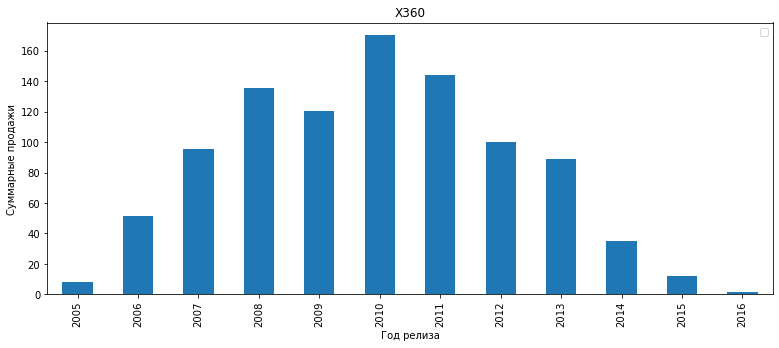

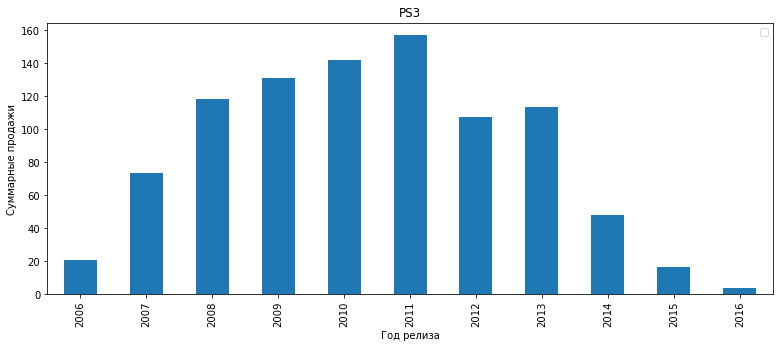

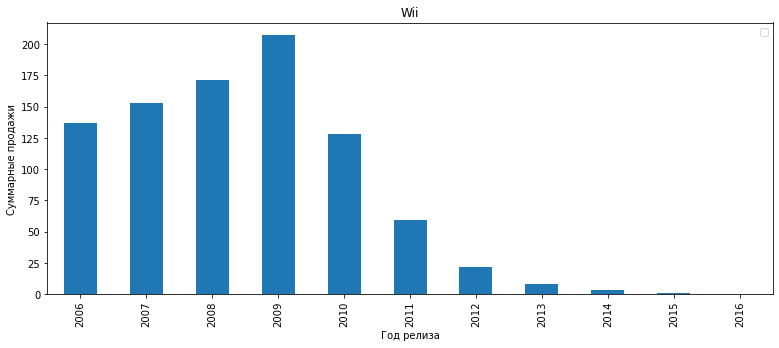

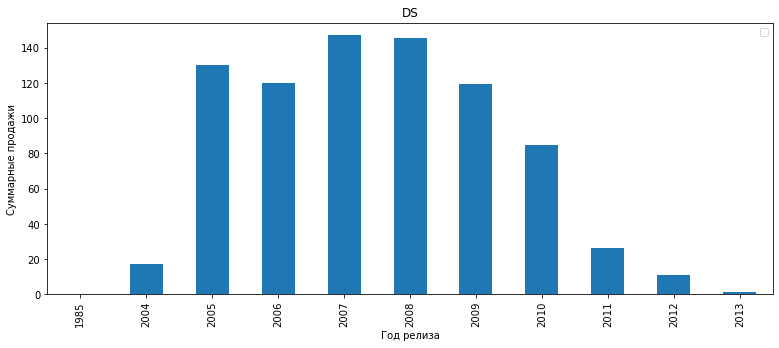

In [18]:
popular_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()

for platform in popular_platform_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13, 5))
    plt.title(platform)
    plt.legend('')
    plt.xlabel('Год релиза')
    plt.ylabel('Суммарные продажи')

**Вывод**: 
Из графиков видно, что платформы живут циклами по 9-10 лет.

* Платформа PS2 работала с 2000 по 2010 год, ее пик пришелся на 2002 - 2003 года. 
* Платформа X360 существовала с 2005 по 2016 год, ее пик пришелся на 2010 год.
* Платформа PS2 существовала с 2006 по 2016 год, ее пик пришелся на 2011 год.
* Платформа Wii существовала с 2006 по 2015 год, ее пик пришелся на 2009 год.
* Платформа DS существовала с 2004 по 2013 год, ее пик пришелся на 2009 год.

Необходимо выбрать данные за актуальный период. Думаю, что лучший вариант - это выбрать такой период, когда платформы еще не начали отмирать, когда они актуальны для рынка. По графику видно, что с 2010 года они еще нормально существуют (хотя платформа PS2 уже почти умерла). Поэтому дальше будем рассматривать данные с условием `year_of_release > 2012`

Создадим новый датафрэйм с условием year_of_release > 2012, чтобы учитывать дальше данные только за актуальный период.

In [19]:
good_data = data.query('year_of_release > 2012')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


3) Выясним, какие платформы лидируют по суммарным продажам.

In [20]:
popular_platform = good_data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).reset_index()
popular_platform

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Лидируют по суммарным продажам PS4, PS3, XOne, 3DS и X360. После того, как взяла актуальный период с 2013 года очевидно изменился вывод. Как и ожидалось, продажи платформы PS4 и XOne опередили своих предшественников PS3 и X360. 3DS по-прежнему остается на 4 месте.

4) Построим график «ящик с усами» по глобальным продажам игр в разбивке по этим платформам (PS3, X360, PS4, 3DS и XOne).

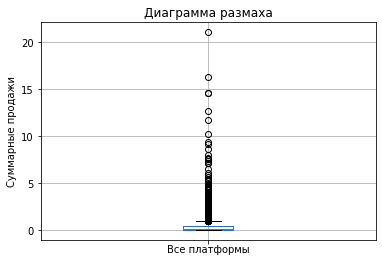

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

In [21]:
good_data.boxplot(column='total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Все платформы')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
good_data['total_sales'].describe()

Среднее значение по общим продажам 0.488442 млн (488 тыс). Медиана же равна 110 тысячам. Различие почти в 4.5 раза можно объяснить тем, что на графике наблюдаются большие выбросы. Максимальная цена чуть больше 21 млн.

На данном графике сложно разглядеть медиану. Мешают большие выбросы. Добавим ограничение на ось plt.ylim(0, 1.25), чтобы лучше разглядеть основные значения.

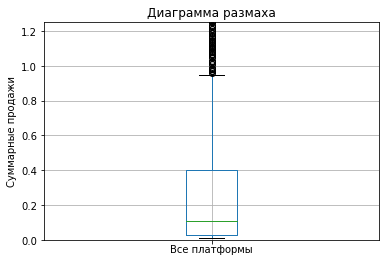

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

In [22]:
good_data.boxplot(column='total_sales')
plt.ylim(0, 1.25)
plt.title('Диаграмма размаха')
plt.xlabel('Все платформы')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
good_data['total_sales'].describe()

Теперь стало видно нашу медиану со значением 0.11 млн.

Построим ящики с усами для платформ, которые лидируют по суммарным продажам (PS3, X360, PS4, 3DS и XOne).

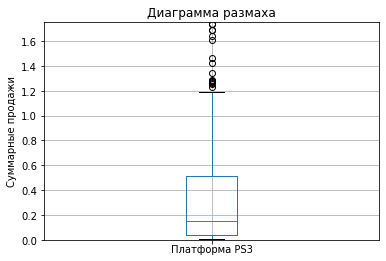

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

In [23]:
PS3_data = good_data.query('platform =="PS3"')
plt.ylim(0, 1.75)
PS3_data.boxplot(column = 'total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа PS3')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
PS3_data['total_sales'].describe()

Средняя выручка по платформе составляет 525 тыс, а максимальное значение 21 млн.

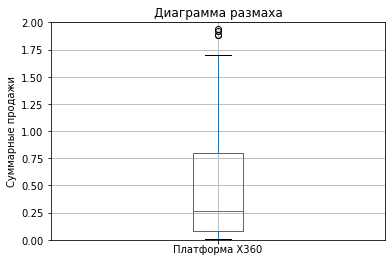

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

In [24]:
X360_data = good_data.query('platform =="X360"')
plt.ylim(0, 2)
X360_data.boxplot(column = 'total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа X360')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
X360_data['total_sales'].describe()

Средняя выручка по платформе составляет 735 тыс, а максимальное значение 16,27 млн.

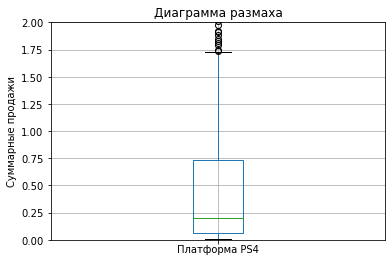

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [25]:
PS4_data = good_data.query('platform =="PS4"')
plt.ylim(0, 2)
PS4_data.boxplot(column = 'total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа PS4')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
PS4_data['total_sales'].describe()

Средняя выручка по платформе составляет 801 тыс, а максимальное значение достигает почти 15 млн.

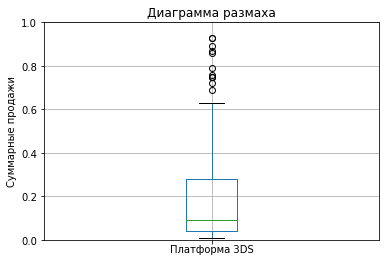

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

In [26]:
DS_data = good_data.query('platform =="3DS"')
plt.ylim(0, 1)
DS_data.boxplot(column = 'total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа 3DS')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
DS_data['total_sales'].describe()

Средняя выручка по платформе составляет 472 тыс, а максимальное значение достигает 14.6 млн.

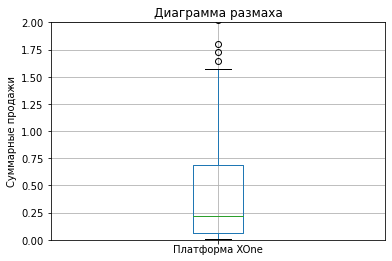

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [27]:
XOne_data = good_data.query('platform =="XOne"')
plt.ylim(0, 2)
XOne_data.boxplot(column = 'total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа XOne')
plt.ylabel('Суммарные продажи')
plt.tick_params(labelbottom=False)
plt.show()
XOne_data['total_sales'].describe()

Средняя выручка по платформе составляет 645 тыс, а максимальное значение достигает 7,4 млн.

Соберем 5 графиков по отдельным платформам на одном.

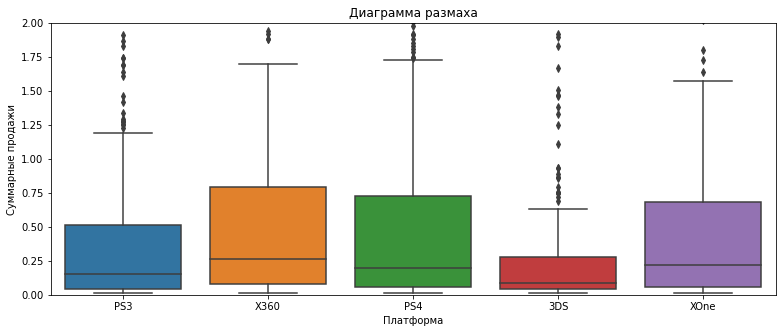

In [28]:
super_platform = ['PS3', 'X360', 'PS4', '3DS', 'XOne']
top_platform = good_data[good_data['platform'].isin(['PS3', 'X360', 'PS4', '3DS', 'XOne'])]

plt.figure(figsize=(13, 5))
plt.ylim(0, 2)
sns.boxplot(data=top_platform, x='platform', y='total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**:
Из общего графика видно, что значение медианы у всех платформ находится на разном уровне, но в области меньше 250 тыс. Больше всего продано игр на платформе X360 - примерно 760 тысяч, на втором месте PS4 и почти на одном уровне с ним находится XOne. Меньше всего продаж у 3DS. Это подтверждает наш вывод из предыдущего вопроса: потенциально прибыльными можно назвать платформы PS4 и XOne, так как она приходит на смену PS3 и X360.

5) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

Будем строить 2 диаграммы: первая по отзывам пользователей, вторая по отзывам критиков, т.к. в первой значения изменяются от 1 до 10, а во второй от 1 до 100.

Возьмем популярную платформу X360 и построим для нее 2 диаграммы рассеяния.

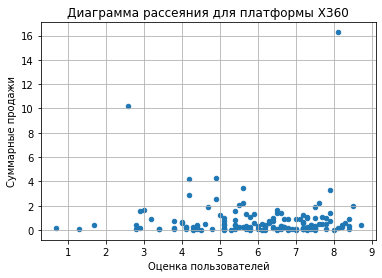

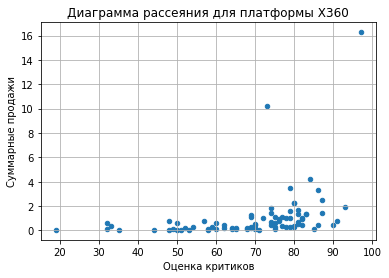

In [29]:
X360_data.sort_values('total_sales').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Диаграмма рассеяния для платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

X360_data.sort_values('total_sales').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Диаграмма рассеяния для платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

Посчитаем корреляции между отзывами пользователей, критиков и продажами.

In [30]:
display(X360_data['user_score'].corr(X360_data['total_sales']))
X360_data['critic_score'].corr(X360_data['total_sales'])

-0.011742185147181334

0.35034454602286647

Значение коэффициента корреляции 0,0389 говорит о том, что связи между отзывами пользователй и продажами почти нет.  
Между отзывами критиков и продажами связь больше, но все равно слабая. Значение коэффициента корреляции 0.39.

Построим диаграммы рассеяния для 5 платформ

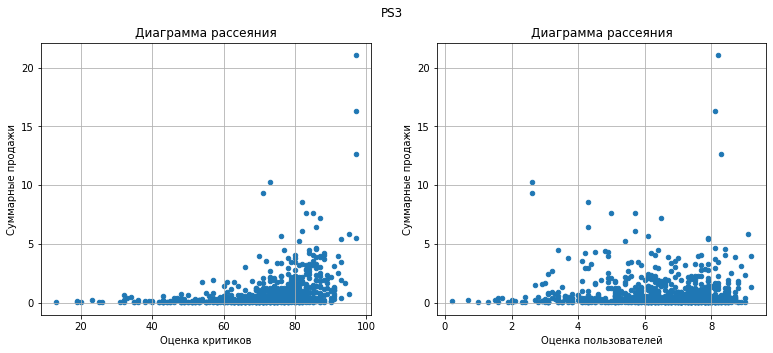

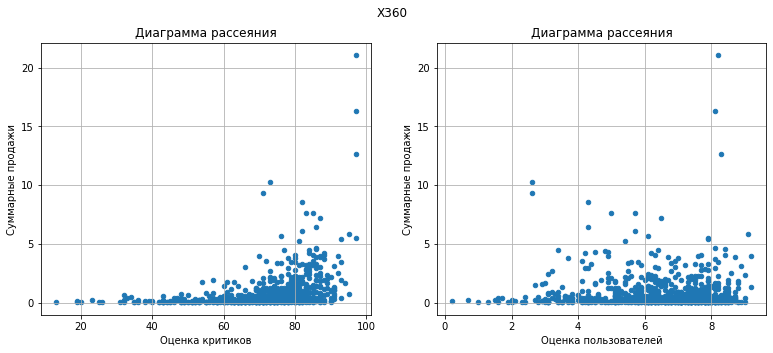

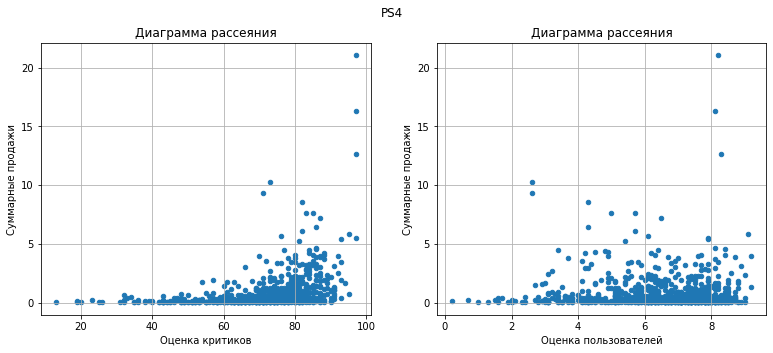

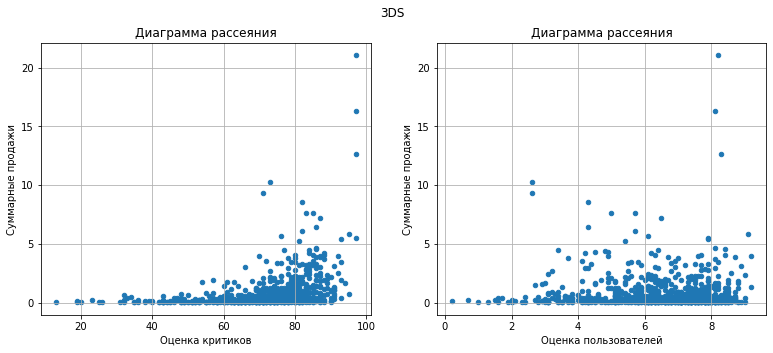

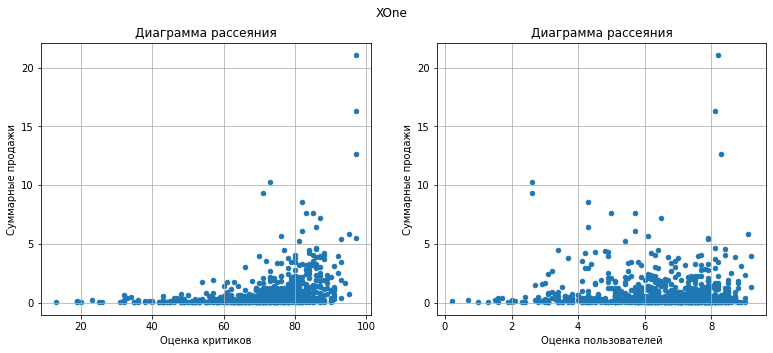

In [31]:
super_platform = ['PS3', 'X360', 'PS4', '3DS', 'XOne']
top_platform = good_data[good_data['platform'].isin(['PS3', 'X360', 'PS4', '3DS', 'XOne'])]

for platform in super_platform:
    fig, ax = plt.subplots(1 ,2, figsize=(13, 5))
    top_platform.plot(x='critic_score',y='total_sales', kind='scatter', grid=True, subplots=True, title=platform, ax=ax[0])
    top_platform.plot(x='user_score',y='total_sales', kind='scatter', grid=True, subplots=True, title=platform, ax=ax[1])
    ax[0].set(xlabel='Оценка критиков', ylabel='Суммарные продажи', title='Диаграмма рассеяния')
    ax[1].set(xlabel='Оценка пользователей', ylabel='Суммарные продажи', title='Диаграмма рассеяния')

Посчитаем коэффициенты корреляции для платформ 'PS3', 'X360', 'PS4', '3DS', 'XOne'.

In [32]:
super_platform = ['PS3', 'X360', 'PS4', '3DS', 'XOne']
for platform in super_platform:    
    platform = good_data[good_data['platform'] == platform]
    print(f"Корреляция с пользовательскими оценками: {platform['user_score'].corr(platform['total_sales'])}")
    print(f"Корреляция с оценками критиков: {platform['critic_score'].corr(platform['total_sales'])}")
    print(10*'-')

Корреляция с пользовательскими оценками: 0.0023944027357567033
Корреляция с оценками критиков: 0.33428533933719184
----------
Корреляция с пользовательскими оценками: -0.011742185147181334
Корреляция с оценками критиков: 0.35034454602286647
----------
Корреляция с пользовательскими оценками: -0.03195711020455644
Корреляция с оценками критиков: 0.40656790206178123
----------
Корреляция с пользовательскими оценками: 0.24150411773563005
Корреляция с оценками критиков: 0.3570566142288104
----------
Корреляция с пользовательскими оценками: -0.06892505328279418
Корреляция с оценками критиков: 0.41699832800840153
----------


Создадим новый датафрейм `score` со значениями коэффициентов корреляции для рейтинга пользователей и критиков.

In [33]:
score = pd.DataFrame({'platform_name': ['X360', 'PS3', 'PS4', '3DS', 'XOne'],
                      'user_score': [X360_data['user_score'].corr(X360_data['total_sales']), PS3_data['user_score'].corr(PS3_data['total_sales']), PS4_data['user_score'].corr(PS4_data['total_sales']), DS_data['user_score'].corr(DS_data['total_sales']), XOne_data['user_score'].corr(XOne_data['total_sales'])],
                      'critic_score': [X360_data['critic_score'].corr(X360_data['total_sales']), PS3_data['critic_score'].corr(PS3_data['total_sales']), PS4_data['critic_score'].corr(PS4_data['total_sales']), DS_data['critic_score'].corr(DS_data['total_sales']), XOne_data['critic_score'].corr(XOne_data['total_sales'])]})
score.head()

,platform_name,user_score,critic_score
0,X360,-0.011742,0.350345
1,PS3,0.002394,0.334285
2,PS4,-0.031957,0.406568
3,3DS,0.241504,0.357057
4,XOne,-0.068925,0.416998


**Вывод**:  

Наибольшую корреляцию (0.241504) между отзывами пользователей и продажами имеет платформа 3DS. При этом корреляция слабая. Остальные платформы имеют еще меньшую зависимость от оценок пользователей, точнее, ее почти нет, так как коэффициенты корреляции меньше 0.1. То есть, продажи совсем не зависят от оценок пользователей.

Связь продаж и оценок критиков сильнее, чем от простых пользователей. Нибольшую зависимость имеют 2 платформы: XOne и PS4. Коэффициенты корреляции положительные, значит, что с ростом оценок критиков увеличиваются и продажи.

6) Посмотрим на общее распределение игр по жанрам.

In [34]:
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [35]:
genre_data = good_data[['genre', 'total_sales']].groupby('genre')['total_sales'].sum().reset_index()
genre_data

,genre,total_sales
0,Action,321.87
1,Adventure,23.64
2,Fighting,35.31
3,Misc,62.82
4,Platform,42.63
5,Puzzle,3.17
6,Racing,39.89
7,Role-Playing,145.89
8,Shooter,232.98
9,Simulation,21.76


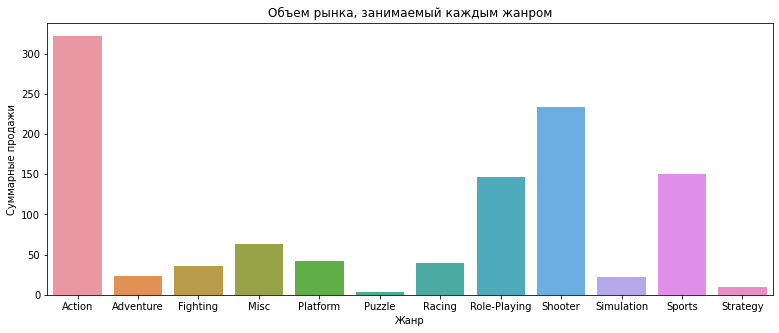

In [36]:
plt.figure(figsize=(13, 5))
plt.title('Объем рынка, занимаемый каждым жанром')
sns.barplot(data=genre_data, x='genre', y='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**:

Больше всего на рынке игр в жанре Action. Его общие продажи составляют 557.80 млн. На втором месте Shooter с продажами в 402.91 млн. Сразу несколько жанров можно объединить в одну группу с низким объемом рынка (меньше 100 млн). Это Adventure, Fighting, Platform, Puzzle, Racing, Simulation и Strategy. Меньше всего пользователи играют в игры жанра Puzzle.

Посчитаем прибыльность по каждому жанру. Для этого сначала узнаем, сколько игр каждого жанра у нас есть. Затем поделим продажи по жанру на количество игр.

,genre,total_sales,count_games,income_genre
0,Action,321.87,766,0.420196
1,Adventure,23.64,245,0.096490
2,Fighting,35.31,80,0.441375
3,Misc,62.82,155,0.405290
4,Platform,42.63,74,0.576081


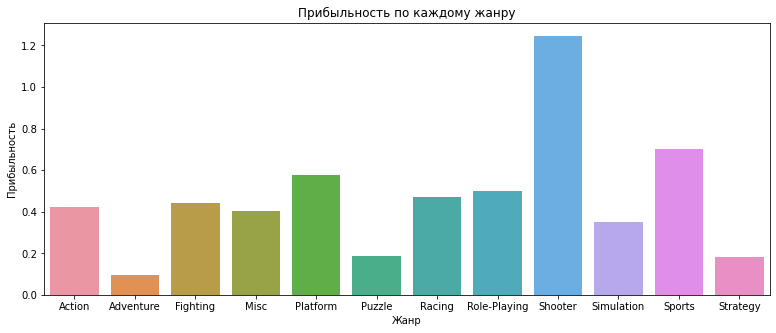

In [37]:
genre_data_name = good_data[['name', 'genre', 'total_sales']]
genre_data_name = genre_data_name.groupby('genre')['name'].count().reset_index()
genre_data_name

data_genre = genre_data.merge(genre_data_name, on='genre', how='outer')
data_genre = data_genre.rename(columns={'name':'count_games'})
data_genre['income_genre'] = data_genre['total_sales'] / data_genre['count_games']
display(data_genre.head())

plt.figure(figsize=(13, 5))
plt.title('Прибыльность по каждому жанру')
sns.barplot(data=data_genre, x='genre', y='income_genre')
plt.xlabel('Жанр')
plt.ylabel('Прибыльность')
plt.show()

**Вывод**:

Несмотря на то, что игры в жанре Action являются наиболее популярными, самые большие продажи приносит жанр Shooter (примерно 1.2 млн за игру). Наименьший доход у игр жанра Adventure (примерно 0.1 млн).

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [38]:
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Сначала определим самые популярные платформы для каждого региона.

In [39]:
na_data = good_data[['name', 'platform', 'genre', 'na_sales', 'rating']]
eu_data = good_data[['name', 'platform', 'genre', 'eu_sales', 'rating']]
jp_data = good_data[['name', 'platform', 'genre', 'jp_sales', 'rating']]

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


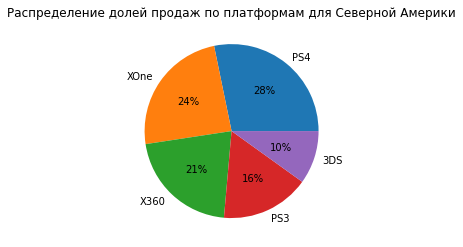

In [40]:
na_platform = na_data[['platform', 'na_sales']].groupby('platform')['na_sales'].sum().reset_index()
na_platform = na_platform.sort_values(by='na_sales', ascending=False)
display(na_platform.head())

data = [108.74, 93.12, 81.66, 63.50, 38.20]
labels = ['PS4', 'XOne', 'X360', 'PS3', '3DS']
plt.title('Распределение долей продаж по платформам для Северной Америки')
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


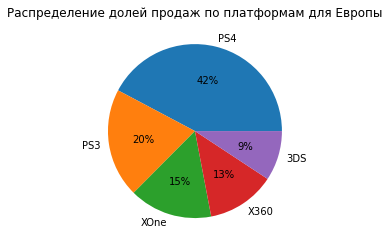

In [41]:
eu_platform = eu_data[['platform', 'eu_sales']].groupby('platform')['eu_sales'].sum().reset_index()
eu_platform = eu_platform.sort_values(by='eu_sales', ascending=False)
display(eu_platform.head())

data = [141.09, 67.81, 51.59, 42.52, 30.96]
labels = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
plt.title('Распределение долей продаж по платформам для Европы')
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


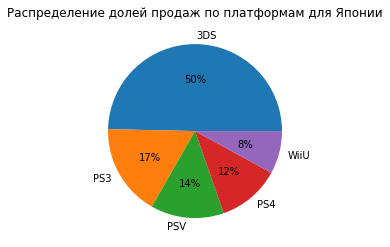

In [42]:
jp_platform = jp_data[['platform', 'jp_sales']].groupby('platform')['jp_sales'].sum().reset_index()
jp_platform = jp_platform.sort_values(by='jp_sales', ascending=False)
display(jp_platform.head())

data = [67.81, 23.35, 18.59, 15.96, 10.88]
labels = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
plt.title('Распределение долей продаж по платформам для Японии')
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Самыми популярными платформами (в порядке убывания продаж) для пользователей являются:
* Северная Америка - PS4, XOne, X360, PS3, 3DS.
* Европа - PS4, PS3, XOne, X360, 3DS.
* Япония - 3DS, PS3, PSV, PS4, WiiU.

Платформы PS4, PS3, 3DS являются популярными во всех трех регионах.

Посмотрим, какую долю от всех продаж составляют популярные платформы.

In [43]:
platform_data = good_data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
platform_data.head()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


In [44]:
na_platform_data = na_platform.merge(platform_data, on='platform', how='outer')
na_platform_data['na_part_sales'] = na_platform_data['na_sales'] / na_platform_data['total_sales']
na_platform_data.head()

,platform,na_sales,total_sales,na_part_sales
0,PS4,108.74,314.14,0.346151
1,XOne,93.12,159.32,0.584484
2,X360,81.66,136.80,0.596930
3,PS3,63.50,181.43,0.349997
4,3DS,38.20,143.25,0.266667


Для Северной Америки доля самой популярной платформы PS4 составляет всего 0.34. У XOne и X360 почти одинаковые доли продаж, примерно 0.6.

In [45]:
eu_platform_data = eu_platform.merge(platform_data, on='platform', how='outer')
eu_platform_data['eu_part_sales'] = eu_platform_data['eu_sales'] / eu_platform_data['total_sales']
eu_platform_data.head()

,platform,eu_sales,total_sales,eu_part_sales
0,PS4,141.09,314.14,0.449131
1,PS3,67.81,181.43,0.373753
2,XOne,51.59,159.32,0.323814
3,X360,42.52,136.80,0.310819
4,3DS,30.96,143.25,0.216126


Для Европы доля самой популярной платформы PS4 составляет почти 0.45, на втором месте идет PS3 и ее доля меньше, чем у PS4 - 0.37. Это говорит о том, что пользователи перешли на новую модель PS4, которая стала более прибыльной. Пятерку лидеров замыкает 3DS с наименьшей долей от всех продаж 0.21.

In [46]:
jp_platform_data = jp_platform.merge(platform_data, on='platform', how='outer')
jp_platform_data['jp_part_sales'] = jp_platform_data['jp_sales'] / jp_platform_data['total_sales']
jp_platform_data.head()

,platform,jp_sales,total_sales,jp_part_sales
0,3DS,67.81,143.25,0.473368
1,PS3,23.35,181.43,0.128700
2,PSV,18.59,32.99,0.563504
3,PS4,15.96,314.14,0.050805
4,WiiU,10.88,64.63,0.168343


В Японии самая популярная платформа 3DS занимает 0.47 от всех продаж. На последнем месте WiiU с долей продаж 0.16.

Объединим все данные в одну таблицу `all_platform_data_sales`.

In [47]:
na_platform_data_sales = na_platform_data[['platform', 'na_part_sales']]
eu_platform_data_sales = eu_platform_data[['platform', 'eu_part_sales']]
jp_platform_data_sales = jp_platform_data[['platform', 'jp_part_sales']]

all_platform_data = na_platform_data_sales.merge(eu_platform_data_sales, on='platform', how='outer')
all_platform_data = all_platform_data.merge(jp_platform_data_sales, on='platform', how='outer')
all_platform_data['other_part_sales'] = 1 - (all_platform_data['na_part_sales'] + all_platform_data['eu_part_sales'] + all_platform_data['jp_part_sales'])
all_platform_data

,platform,na_part_sales,eu_part_sales,jp_part_sales,other_part_sales
0,PS4,0.346151,0.449131,0.050805,0.153912
1,XOne,0.584484,0.323814,0.002134,0.089568
2,X360,0.596930,0.310819,0.003728,0.088523
3,PS3,0.349997,0.373753,0.128700,0.147550
4,3DS,0.266667,0.216126,0.473368,0.043839
5,WiiU,0.451957,0.307133,0.168343,0.072567
6,PC,0.281765,0.643165,0.000000,0.075070
7,Wii,0.480234,0.434114,0.003660,0.081991
8,PSV,0.152774,0.184905,0.563504,0.098818
9,DS,0.370130,0.551948,0.000000,0.077922


Построим круговые диаграммы для платформ, которыми пользуются во всех 3 регионах. Это PS3, PS4, 3DS.

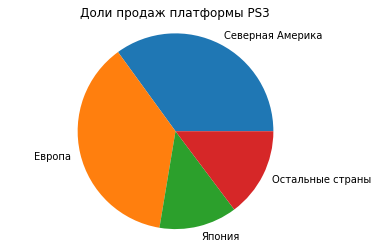

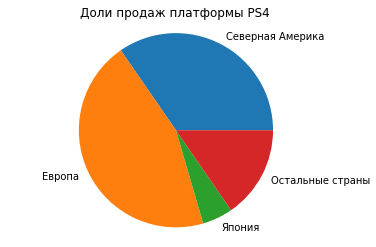

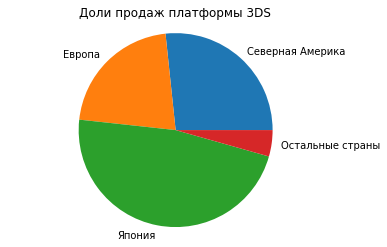

In [48]:
vals = [0.349997, 0.373753, 0.128700, 0.147550]
labels = ["Северная Америка", "Европа", "Япония", "Остальные страны"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title('Доли продаж платформы PS3')
plt.show()

vals = [0.346151, 0.449131, 0.050805, 0.153912]
labels = ["Северная Америка", "Европа", "Япония", "Остальные страны"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title('Доли продаж платформы PS4')
plt.show()

vals = [0.266667, 0.216126, 0.473368, 0.043839]
labels = ["Северная Америка", "Европа", "Япония", "Остальные страны"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title('Доли продаж платформы 3DS')
plt.show()

Теперь выявим самые популярные жанры.

In [49]:
na_genre = na_data[['genre', 'na_sales']].groupby('genre')['na_sales'].sum().reset_index()
na_genre = na_genre.sort_values(by='na_sales', ascending=False)
display(na_genre.head())

eu_genre = eu_data[['genre', 'eu_sales']].groupby('genre')['eu_sales'].sum().reset_index()
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)
display(eu_genre.head())

jp_genre = jp_data[['genre', 'jp_sales']].groupby('genre')['jp_sales'].sum().reset_index()
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)
jp_genre.head()

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


**Вывод**:

Самыми популярными жанрами (в порядке убывания продаж) для пользователей являются:
* Северная Америка - Action, Shooter, Sports, Role-Playing, Misc.
* Европа - Action, Shooter, Sports, Role-Playing, Racing.
* Япония - Role-Playing, Action, Misc, Fighting, Platform.

Американцы и европейцы выбирают одни и те же жанры, отличие только в Misc. На 5 месте он у американцев, а у европейцев Racing.  
Жанры Action и Role-Playing любят во всех странах.

Определим, влияет ли рейтинг ESRB на продажи в каждом регионе.

In [50]:
na_rating = na_data[['rating', 'na_sales']].groupby('rating')['na_sales'].sum().reset_index()
na_rating = na_rating.sort_values(by='na_sales', ascending=False)
display(na_rating.head())

eu_rating = eu_data[['rating', 'eu_sales']].groupby('rating')['eu_sales'].sum().reset_index()
eu_rating = eu_rating.sort_values(by='eu_sales', ascending=False)
display(eu_rating.head())

jp_rating = jp_data[['rating', 'jp_sales']].groupby('rating')['jp_sales'].sum().reset_index()
jp_rating = jp_rating.sort_values(by='jp_sales', ascending=False)
jp_rating.head()

,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


**Вывод**:

Рейтинг ESRB влияет на продажи в каждом регионе.  
Для Америки и Европы результаты получились одинаковыми. Большинство продаж с рейтингом М - подходит для лиц старше 17 лет. Игры ориентированы на взрослых пользователей.  
В Японии на первое место вышли игры с рейтингом Т (подходит для лиц старше 13 лет).

Рассмотрим игры c рейтингом Е.

In [51]:
good_data['rating'].unique()
rating_E = good_data[good_data['rating'] == 'E']
rating_E = rating_E.groupby('genre')['name'].count().reset_index()
rating_E = rating_E.sort_values(by='name', ascending=False)

rating_na = good_data[good_data['rating'] == 'E'].groupby('genre')['na_sales'].sum().reset_index()
rating_eu = good_data[good_data['rating'] == 'E'].groupby('genre')['eu_sales'].sum().reset_index()
rating_jp = good_data[good_data['rating'] == 'E'].groupby('genre')['jp_sales'].sum().reset_index()

rating_na_E = rating_E.merge(rating_na, on='genre', how='outer')
rating_na_eu_E = rating_na_E.merge(rating_eu, on='genre', how='outer')


rating_na_eu_jp_E = rating_na_eu_E.merge(rating_jp, on='genre', how='outer')
rating_na_eu_jp_E = rating_na_eu_jp_E.rename(columns={'name': 'count_games'})
rating_na_eu_jp_E = rating_na_eu_jp_E.sort_values(by='count_games', ascending=False)
rating_na_eu_jp_E

,genre,count_games,na_sales,eu_sales,jp_sales
0,Sports,129,50.53,52.29,2.04
1,Action,51,5.49,5.05,3.21
2,Racing,50,8.17,11.96,1.89
3,Platform,25,8.70,6.62,3.43
4,Simulation,16,1.23,3.02,1.42
5,Misc,14,2.50,2.33,1.97
6,Strategy,8,0.85,0.67,0.00
7,Puzzle,5,0.59,0.39,0.26
8,Adventure,2,0.31,0.54,0.53
9,Role-Playing,2,0.68,0.49,0.39


Жанр Sports лидирует среди жанров по вневозрастному рейтингу Е. Для Северной Америки и Европы этот жанр находится на 3 месте по популярности. Такой способ присвоить популярному жанру вневозрастной рейтинг приводит к тому, что эти страны хорошо, на нём зарабатывают: по 50 млн.

Рассмотрим игры без рейтинга. Посчитаем, сколько продаётся игр без рейтинга в каждом регионе.

In [52]:
display(good_data['rating'].unique())
no_rating = good_data[good_data['rating'] != 'M']
no_rating = no_rating[no_rating['rating'] != 'E']
no_rating = no_rating[no_rating['rating'] != 'T']
no_rating = no_rating[no_rating['rating'] != 'E10+']
no_rating
 
no_rating_count = no_rating.groupby('genre')['name'].count().reset_index()
no_rating_count = no_rating_count.sort_values(by='name', ascending=False)
no_rating_count = no_rating_count.rename(columns={'name': 'count_games'})
no_rating_count

no_rating_na = no_rating.groupby('genre')['na_sales'].sum().reset_index()
no_rating_eu = no_rating.groupby('genre')['eu_sales'].sum().reset_index()
no_rating_jp = no_rating.groupby('genre')['jp_sales'].sum().reset_index()

no_rating_regions = no_rating_count.merge(no_rating_na, on='genre', how='outer')
no_rating_regions = no_rating_regions.merge(no_rating_eu, on='genre', how='outer')
no_rating_regions = no_rating_regions.merge(no_rating_jp, on='genre', how='outer')
no_rating_regions = no_rating_regions.sort_values(by='count_games', ascending=False)
no_rating_regions

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

,genre,count_games,na_sales,eu_sales,jp_sales
0,Action,347,17.36,17.18,23.41
1,Adventure,185,2.80,3.06,4.84
2,Role-Playing,154,22.16,16.28,36.24
3,Misc,91,13.79,10.93,6.08
4,Sports,46,1.05,0.94,3.27
5,Fighting,32,7.14,3.24,4.93
6,Simulation,31,1.92,4.53,2.49
7,Strategy,31,0.16,0.31,1.45
8,Shooter,26,19.56,16.89,0.81
9,Racing,18,1.04,2.66,0.24


Рассмотрели игры без рейтинга. Видно, что жанр Action вышел на первый план по количеству игр без рейтинга, а он у нас на 1 месте по популярности для Северной Америки и Европы. В Японии жанр Action на 2 месте по популярности, но для игр без рейтинга Япония зарабатывает на нем больше, чем другие регионы. Продажи игр жанра Action в этих странах получились почти одинаковые (17.36 и 17.18 млн), у Японии 23.41. На 1 месте по продажам для Северной Америки игры жанра Role-Playing, они тоже входили в топ-5 для этой страны.

In [53]:
good_data['rating'].head()

16      M
23      M
31    NaN
33    NaN
42      M
Name: rating, dtype: object

## Проверка гипотез

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC совпадают.**

У нас есть нулевая гипотеза Н_0 - cредние пользовательские рейтинги платформ Xbox One (XOne) и PC совпадают, т.е. средние значения равны. Н_1 - cредние пользовательские рейтинги платформ Xbox One и PC различается, т.е. средние значения не равны.

Проведем ttest (st.ttest_ind) и исходя из p-value решим, принять или отвергнуть нулевую гипотезу.

In [54]:
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Проверим, нет ли пустых значений в столбце user_score для наших платформ XOne и PC. Если они есть, то удалим строки с пропусками, чтобы не учитывать игры без рейтинга.

In [55]:
good_data.query('platform == "XOne"')['user_score']

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

In [56]:
good_data.query('platform == "PC"')['user_score']

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16509    7.9
16518    1.4
16617    NaN
16631    NaN
16692    7.6
Name: user_score, Length: 189, dtype: float64

In [57]:
XOne_rating = good_data.query('platform == "XOne"')['user_score'].dropna()
PC_rating = good_data.query('platform == "PC"')['user_score'].dropna()

In [58]:
XOne_rating.head()

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

Посчитаем средние значения и дисперсии для XOne_rating и PC_rating. Построим гистограммы для платформ XOne и PC.

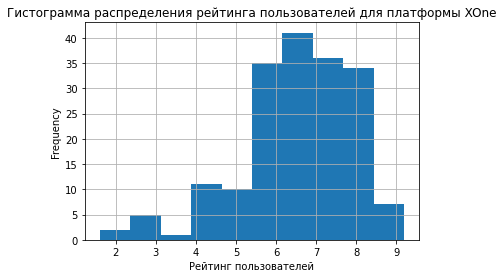

Среднее значение для платформы XOne: 6.52142857142857
Дисперсия для платформы XOne: 1.9069968429360702


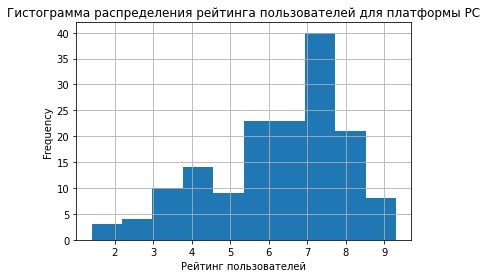

Среднее значение для платформы PC: 6.269677419354836
Дисперсия для платформы PC: 3.035892752408884


In [59]:
XOne_rating.plot(kind='hist', grid=True, x='user_score')
plt.title('Гистограмма распределения рейтинга пользователей для платформы XOne')
plt.xlabel('Рейтинг пользователей')
plt.show()
print('Среднее значение для платформы XOne:', XOne_rating.mean())
print('Дисперсия для платформы XOne:', np.var(XOne_rating, ddof=1))

PC_rating.plot(kind='hist', grid=True, x='user_score')
plt.title('Гистограмма распределения рейтинга пользователей для платформы PC')
plt.xlabel('Рейтинг пользователей')
plt.show()
print('Среднее значение для платформы PC:', PC_rating.mean())
print('Дисперсия для платформы PC:', np.var(PC_rating, ddof=1))

Средние значения почти совпадают, а дисперсии различаются. Добавим в функцию st.ttest_ind аргумент equal_var со значением False.

In [60]:
sample_1 = XOne_rating
sample_2 = PC_rating
 
alpha = .05 # критический уровень статистической значимости
 
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Я выбрала уровень статистической значимости (alpha) равным 5%, т.к. у нас небольшой размер данных. Если бы их было несколько млн, то можно было взять бы и 1%.

**Вывод**: p-value получилось меньше критического уровеня статистической значимости, значит, принимаем нашу нулевую гипотезу. Получается, что cредние пользовательские рейтинги платформ XOne и PC совпадают.

**Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports равны**

Нулевая гипотеза Н_0 - средние пользовательские рейтинги жанров Action и Sports равны. Н_1 - средние пользовательские рейтинги жанров Action и Sports разные, т.е. они не равны.

Проведем ttest (st.ttest_ind) и исходя из p-value решим, принять или отвергнуть нулевую гипотезу.

In [61]:
good_data.query('genre == "Action"')['user_score']

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16680    NaN
16691    NaN
16692    7.6
16699    NaN
16710    NaN
Name: user_score, Length: 766, dtype: float64

In [62]:
good_data.query('genre == "Sports"')['user_score']

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16428    NaN
16450    4.5
16518    1.4
16638    NaN
16643    6.6
Name: user_score, Length: 214, dtype: float64

In [63]:
action_rating = good_data.query('genre == "Action"')['user_score'].dropna()
sports_rating = good_data.query('genre == "Sports"')['user_score'].dropna()

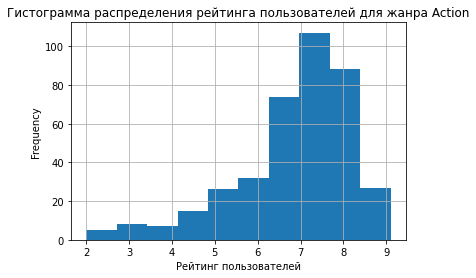

Среднее значение для жанра Action: 6.837532133676097
Дисперсия для для жанра Action: 1.76936090424827


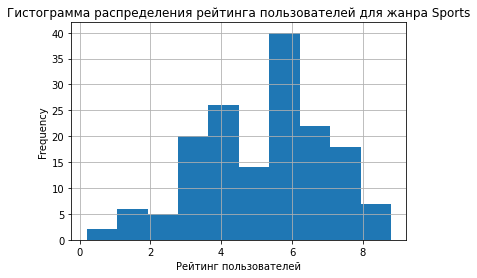

Среднее значение для жанра Sports: 5.238124999999999
Дисперсия для жанра Sports: 3.1806128144654062


In [64]:
action_rating.plot(kind='hist', grid=True, x='user_score')
plt.title('Гистограмма распределения рейтинга пользователей для жанра Action')
plt.xlabel('Рейтинг пользователей')
plt.show()
print('Среднее значение для жанра Action:', action_rating.mean())
print('Дисперсия для для жанра Action:', np.var(action_rating, ddof=1))

sports_rating.plot(kind='hist', grid=True, x='user_score')
plt.title('Гистограмма распределения рейтинга пользователей для жанра Sports')
plt.xlabel('Рейтинг пользователей')
plt.show()
print('Среднее значение для жанра Sports:', sports_rating.mean())
print('Дисперсия для жанра Sports:', np.var(sports_rating, ddof=1))

Средние значения у двух жанров различаются. У жанра Action 6.83, у Sports 5.23. Дисперсии тоже различны. У жанра Action примерно 1.7, у Sports 3.2. Так же, как и для первой гипотезы, добавим в функцию st.ttest_ind аргумент equal_var со значением False.

In [65]:
sample_1 = action_rating
sample_2 = sports_rating
 
alpha = .05 # критический уровень статистической значимости
 
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**: p-value получилось меньше alpha, значит, мы отвергаем нашу нулевую гипотезу. Получается, что средние пользовательские рейтинги жанров Action и Sports не равны. 

## Общий вывод

1) Заменили названия столбцов, преобразовали данные в нужные типы, обработали пропуски.

2) Определили, что данные за весь период не нужны. Остановились на данных, начиная с 2013 года.

3) Выбрали платформы, лидирующие по суммарным продажам. Это PS4, PS3, XOne, X360, 3DS. 

4) Определили, что продажи совсем не зависят от оценок пользователей, но зависят от оценок критиков. Наибольшую зависимость имеют 2 платформы: XOne и PS4. Коэффициенты корреляции положительные, значит, с ростом оценок критиков увеличиваются и продажи.

5) Определили, что несмотря на то, что игры в жанре Action являются наиболее популярными, самые большие продажи приносит жанр Shooter (примерно 1.2 млн за игру). Наименьший доход у игр жанра Adventure (примерно 0.1 млн).

6) Составили портрет пользователя для каждого региона.

7) Определили, что платформы PS4, PS3, DS являются популярными во всех трех регионах.

8) Американцы и европейцы выбирают одни и те же жанры игр, отличие только в Misc. На 5 месте он у американцев, а у европейцев Racing. Жанры Action и Role-Playing любят во всех странах.

9) Определили, что рейтинг ESRB влияет на продажи в каждом регионе. Для Америки и Европы получили одинаковый результат. Большинство игр подходит для лиц старше 17 лет. В Японии на первое место вышли игры с рейтингом Т (подходит для лиц старше 13 лет). Выяснили, что игры жанра Sports по вневозрастному рейтингу Е. Для Северной Америки и Европы этот жанр находится на 3 месте по популярности. Такой способ присвоить популярному жанру вневозрастной рейтинг приводит к тому, что эти страны хорошо, на нём зарабатывают: по 50 млн.

10) Проверили первую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC совпадают. Подтвердили эту гипотезу.

11) Проверили вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны. Отвергли ее. Выяснили, что средние рейтинги двух жанров отличаются. Рейтинг у жанра action выше, чем у sports.

Проделав данную работу, мы определили, что успешность игры зависит от того, на какой платформе она выходит, от жанра и от региона, в котором она была создана.
Самыми перспективными платформами являются PS4, XOne.
Самым популярным жанром является Action, но наибольшие продажи у игр жанра Shooter. Стоит продвигать их.